In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
df = pd.read_csv('advertising.csv')
df.head(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
5,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0
6,88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,2016-01-28 20:59:32,0
7,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,2016-03-07 01:40:15,1
8,74.53,30,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,2016-04-18 09:33:42,0
9,69.88,20,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,2016-07-11 01:42:51,0


In [49]:
df.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [50]:
summary = df.groupby('City').agg(
    total_city=('City', 'size'), 
    total_clicked=('Clicked on Ad', 'sum')
).assign(CTR=lambda x: (x['total_clicked'] / x['total_city']) * 100)\
 .sort_values(by='total_city', ascending=False)

print(summary)

                 total_city  total_clicked         CTR
City                                                  
Lisamouth                 3              2   66.666667
Williamsport              3              2   66.666667
Johnstad                  2              0    0.000000
New Sheila                2              0    0.000000
Benjaminchester           2              0    0.000000
...                     ...            ...         ...
Karenton                  1              0    0.000000
Katieport                 1              1  100.000000
Kaylashire                1              0    0.000000
Keithtown                 1              1  100.000000
Zacharyton                1              1  100.000000

[969 rows x 3 columns]


In [51]:
summary = df.groupby('Country').agg(
    total_Country=('Country', 'size'), 
    total_clicked=('Clicked on Ad', 'sum')
).assign(CTR=lambda x: (x['total_clicked'] / x['total_Country']) * 100)\
 .sort_values(by='total_Country', ascending=False)

print(summary)

                       total_Country  total_clicked         CTR
Country                                                        
France                             9              5   55.555556
Czech Republic                     9              4   44.444444
Afghanistan                        8              5   62.500000
Australia                          8              7   87.500000
Turkey                             8              7   87.500000
...                              ...            ...         ...
Montserrat                         1              1  100.000000
Mozambique                         1              0    0.000000
Romania                            1              1  100.000000
Saint Kitts and Nevis              1              1  100.000000
Aruba                              1              0    0.000000

[237 rows x 3 columns]


In [52]:
total_by_gender = df['Male'].value_counts()
clicked_by_gender = df[df['Clicked on Ad'] == 1]['Male'].value_counts()
ctr_by_gender = clicked_by_gender / total_by_gender * 100

results_df = pd.DataFrame({
    'Jumlah': total_by_gender,
    'Total Clicked on Ad': clicked_by_gender,
    'CTR': ctr_by_gender
}).fillna(0)
results_df.loc['Total'] = [total_by_gender.sum(), df['Clicked on Ad'].sum(), df['Clicked on Ad'].sum() / total_by_gender.sum()]

print(results_df)

       Jumlah  Total Clicked on Ad        CTR
Male                                         
0       519.0                269.0  51.830443
1       481.0                231.0  48.024948
Total  1000.0                500.0   0.500000


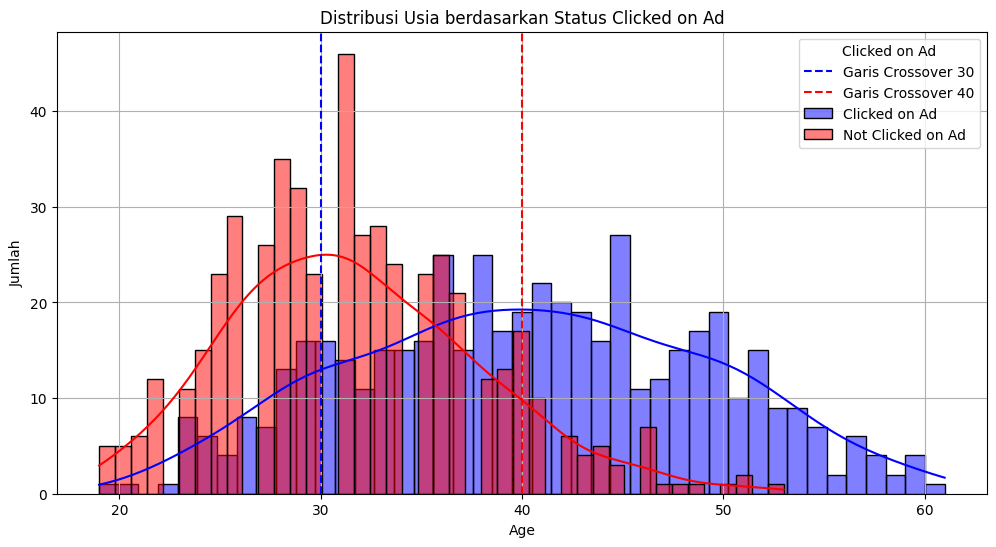

In [53]:
num_bins = 43

# Hitung distribusi usia untuk setiap status klik iklan
age_distribution_clicked = df[df['Clicked on Ad'] == 1]['Age']
age_distribution_not_clicked = df[df['Clicked on Ad'] == 0]['Age']

# Plot distribusi usia dengan CTR
plt.figure(figsize=(12, 6))
sns.histplot(age_distribution_clicked, bins=num_bins, color='blue', label='Clicked on Ad', kde=True)
sns.histplot(age_distribution_not_clicked, bins=num_bins, color='red', label='Not Clicked on Ad', kde=True)

# Menambahkan garis vertikal untuk menandai titik-titik crossover
# Misalnya, menambahkan garis pada posisi tertentu yang dianggap penting
# Gantilah 30 dan 40 dengan nilai yang sesuai berdasarkan analisis distribusi
plt.axvline(x=30, color='blue', linestyle='--', label='Garis Crossover 30')
plt.axvline(x=40, color='red', linestyle='--', label='Garis Crossover 40')

plt.title('Distribusi Usia berdasarkan Status Clicked on Ad')
plt.xlabel('Age')
plt.ylabel('Jumlah')
plt.legend(title='Clicked on Ad')
plt.grid(True)
plt.show()

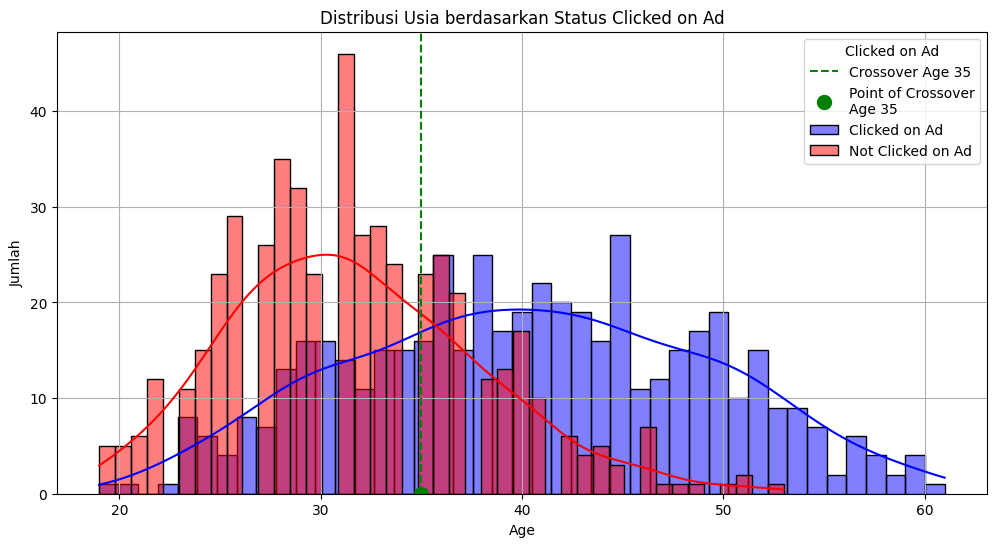

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Misalkan df adalah DataFrame Anda
# df = pd.DataFrame({
#     'Age': [22, 45, 36, 33, 55, 29, 40, 42, 25],
#     'Clicked on Ad': [1, 0, 1, 1, 0, 1, 0, 1, 0]
# })

# Plot distribusi usia untuk setiap status klik iklan
plt.figure(figsize=(12, 6))
sns.histplot(df[df['Clicked on Ad'] == 1]['Age'], bins=43, color='blue', label='Clicked on Ad', kde=True)
sns.histplot(df[df['Clicked on Ad'] == 0]['Age'], bins=43, color='red', label='Not Clicked on Ad', kde=True)

# Perkirakan titik crossover secara visual
visual_crossover_age = 35  # Ubah ini sesuai dengan observasi visual dari grafik

# Plot garis vertikal untuk menandai titik crossover visual
plt.axvline(x=visual_crossover_age, color='green', linestyle='--', label=f'Crossover Age {visual_crossover_age}')

# Tambahkan titik pada grafik untuk menunjukkan lokasi crossover
plt.plot(visual_crossover_age, 0, 'go', markersize=10, label=f'Point of Crossover\nAge {visual_crossover_age}')

plt.title('Distribusi Usia berdasarkan Status Clicked on Ad')
plt.xlabel('Age')
plt.ylabel('Jumlah')
plt.legend(title='Clicked on Ad')
plt.grid(True)
plt.show()


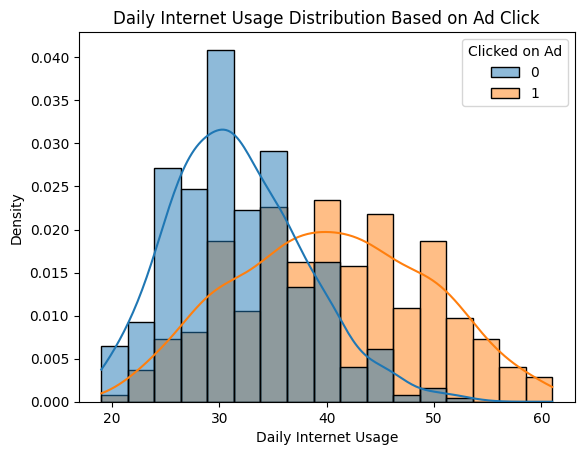

In [55]:
# Membuat histogram dengan Seaborn
sns.histplot(data=df, x='Age', hue='Clicked on Ad', stat='density', kde=True)

# Menambahkan judul dan label sumbu
plt.title('Daily Internet Usage Distribution Based on Ad Click')
plt.xlabel('Daily Internet Usage')
plt.ylabel('Density')

# Menampilkan grafik
plt.show()

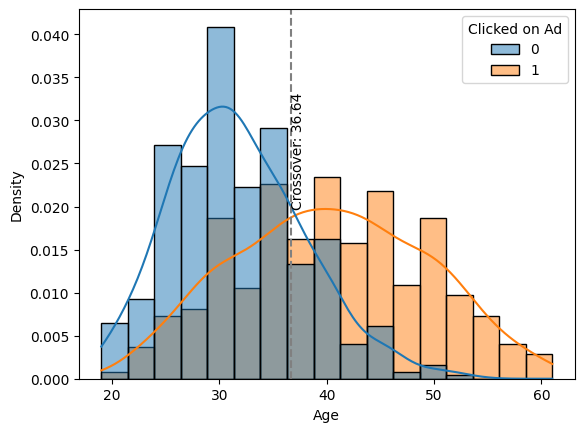

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ... (kode sebelumnya untuk membuat histogram)

# Menghitung titik potong (perkiraan)
# Catatan: Metode ini hanya perkiraan, untuk akurasi lebih tinggi bisa digunakan library khusus
def find_crossover(x, y1, y2):
    for i in range(len(x) - 1):
        if (y1[i] - y2[i]) * (y1[i+1] - y2[i+1]) < 0:
            return x[i] + (x[i+1] - x[i]) * (y2[i] - y1[i]) / (y1[i+1] - y2[i])
    return None

# Mendapatkan data KDE
ax = sns.histplot(data=df, x='Age', hue='Clicked on Ad', stat='density', kde=True)
kde_lines = ax.get_lines()
x, y1 = kde_lines[0].get_data()
x, y2 = kde_lines[1].get_data()

# Mencari titik crossover
crossover_age = find_crossover(x, y1, y2)

# Menambahkan garis vertikal dan label
if crossover_age is not None:
    plt.axvline(x=crossover_age, color='gray', linestyle='--')
    plt.text(crossover_age, 0.02, f"Crossover: {crossover_age:.2f}", rotation=90)

# Menampilkan grafik
plt.show()

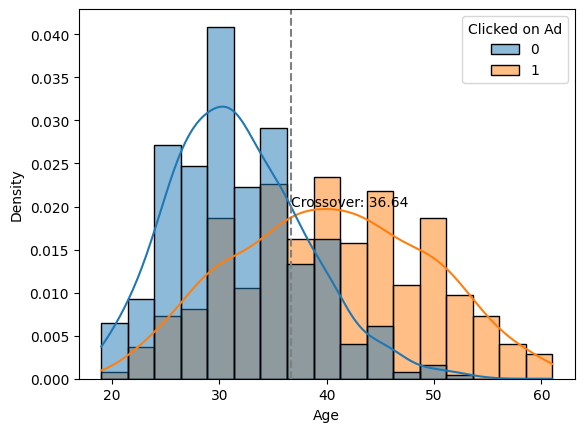

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def find_crossover(x, y1, y2):
    for i in range(len(x) - 1):
        if (y1[i] - y2[i]) * (y1[i+1] - y2[i+1]) < 0:
            return x[i] + (x[i+1] - x[i]) * (y2[i] - y1[i]) / (y1[i+1] - y2[i])
    return None

# Mendapatkan data KDE
ax = sns.histplot(data=df, x='Age', hue='Clicked on Ad', stat='density', kde=True)
kde_lines = ax.get_lines()
x, y1 = kde_lines[0].get_data()
x, y2 = kde_lines[1].get_data()

# Mencari titik crossover
crossover_age = find_crossover(x, y1, y2)

# Menambahkan garis vertikal dan label
if crossover_age is not None:
    plt.axvline(x=crossover_age, color='gray', linestyle='--')
    plt.text(crossover_age, 0.02, f"Crossover: {crossover_age:.2f}", rotation=0)  # Perhatikan rotation=0 di sini

# Menampilkan grafik
plt.show()

Rata-rata klik iklan untuk kelompok muda: 0.3094405594405594
Rata-rata klik iklan untuk kelompok tua: 0.7546728971962616
t-statistic: -15.50, p-value: 0.0000


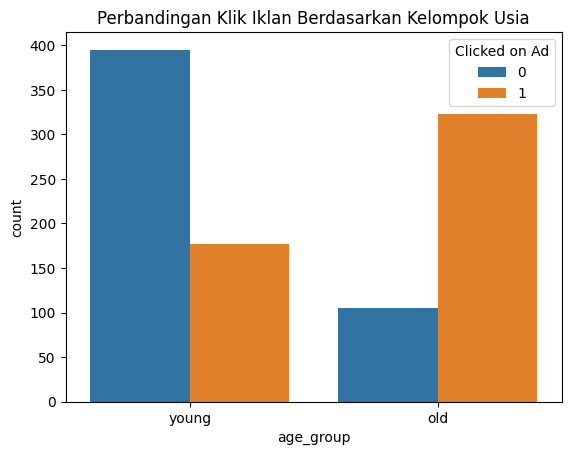

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Asumsikan Anda sudah memiliki DataFrame 'df'

# Mencari nilai crossover (contoh menggunakan metode yang telah dijelaskan sebelumnya)
# ... (kode untuk mencari nilai crossover)

# Membagi data menjadi dua kelompok berdasarkan nilai crossover
df['age_group'] = pd.cut(df['Age'], bins=[0, crossover_age, np.inf], labels=['young', 'old'])

# Membandingkan rata-rata klik iklan antara dua kelompok
young_clicks = df[df['age_group'] == 'young']['Clicked on Ad'].mean()
old_clicks = df[df['age_group'] == 'old']['Clicked on Ad'].mean()
print(f"Rata-rata klik iklan untuk kelompok muda: {young_clicks}")
print(f"Rata-rata klik iklan untuk kelompok tua: {old_clicks}")

# Uji t untuk membandingkan rata-rata
t_stat, p_value = ttest_ind(df[df['age_group'] == 'young']['Clicked on Ad'], 
                          df[df['age_group'] == 'old']['Clicked on Ad'])
print(f"t-statistic: {t_stat:.2f}, p-value: {p_value:.4f}")

# Visualisasi
sns.countplot(x='age_group', hue='Clicked on Ad', data=df)
plt.title('Perbandingan Klik Iklan Berdasarkan Kelompok Usia')
plt.show()